In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt

## Chargement du jeu de données

In [2]:
heart_attack = pd.read_csv("Heart Attack Data Set.csv")

X = heart_attack
X = X.drop(columns=["target", "slope", "ca", "thal", "cp", "restecg", "exang", "sex", "fbs"])


X

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


## Classification hiérarchique ascendante

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    default_kwargs = dict(leaf_font_size=10)
    default_kwargs.update(kwargs or {})

    dendrogram(linkage_matrix, **default_kwargs)

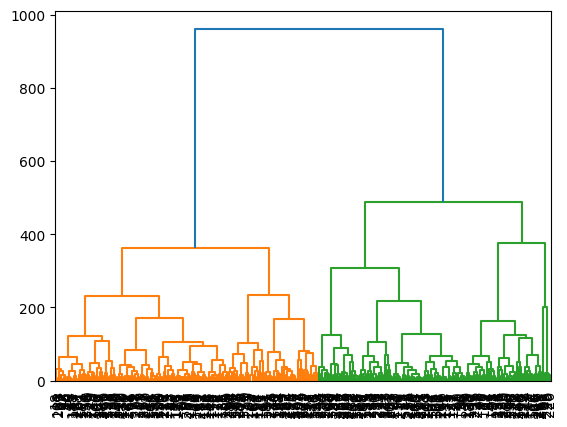

In [4]:
# Classification hierarchique ascendante

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage="ward", metric="euclidean", distance_threshold=None, compute_distances=True, n_clusters=2).fit(X)
plot_dendrogram(clustering)

In [5]:
from sklearn.metrics import rand_score

# Concatener x et les labels

X["cluster"] = clustering.labels_

In [6]:
X[X["cluster"] == 1].describe()

,age,trestbps,chol,thalach,oldpeak,cluster
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.0
mean,52.782609,130.559006,209.645963,151.279503,1.008696,1.0
std,9.595374,16.705480,25.333380,21.901830,1.164924,0.0
min,29.000000,94.000000,126.000000,90.000000,0.000000,1.0
25%,44.000000,120.000000,197.000000,138.000000,0.000000,1.0
50%,53.000000,130.000000,212.000000,154.000000,0.600000,1.0
75%,60.000000,140.000000,230.000000,168.000000,1.600000,1.0
max,76.000000,178.000000,254.000000,202.000000,6.200000,1.0


In [7]:
X[X["cluster"] == 0].describe()

,age,trestbps,chol,thalach,oldpeak,cluster
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.0
mean,56.161972,132.830986,287.781690,147.795775,1.074648,0.0
std,8.128958,18.421762,41.935972,23.935060,1.159814,0.0
min,35.000000,100.000000,236.000000,71.000000,0.000000,0.0
25%,51.000000,120.000000,260.250000,132.000000,0.000000,0.0
50%,57.000000,130.000000,277.500000,152.000000,0.800000,0.0
75%,62.000000,140.000000,304.750000,163.000000,1.750000,0.0
max,77.000000,200.000000,564.000000,195.000000,4.400000,0.0


In [8]:
# Concatener x et les labels

X_copy = heart_attack.copy()
X_copy["cluster"] = clustering.labels_

In [9]:
X_copy[X_copy["cluster"] == 1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1


In [10]:
X_copy[X_copy["cluster"] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0


### K-means

In [11]:
X = heart_attack[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
target = heart_attack['target']
from sklearn.decomposition import PCA

PCA = PCA(n_components=3)
nouvelle_rep = PCA.fit_transform(X)

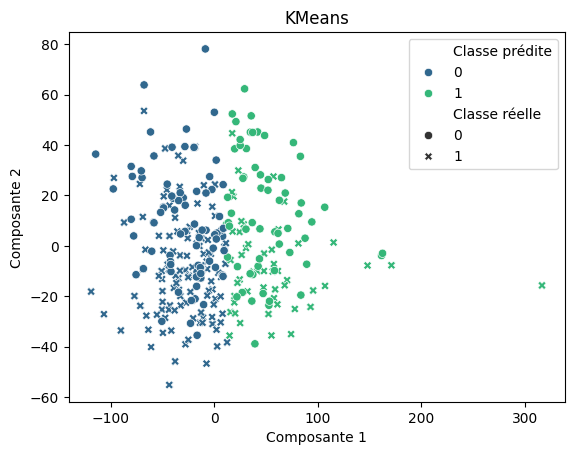

In [20]:
# Kmeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
pred = kmeans.labels_
pred = pd.Series(pred, name="Classe prédite")

target = target.rename("Classe réelle")


sn.scatterplot(x=nouvelle_rep[:, 0], y=nouvelle_rep[:, 1], hue=pred, style=target, palette="viridis").set(title = "KMeans", xlabel = "Composante 1", ylabel = "Composante 2")
plt.show()